The dataset used to train this model comes from the [paper](https://arxiv.org/ftp/arxiv/papers/1909/1909.00125.pdf). 

## Installing dependencies
1. To install `fastai` and other packages, make sure you choose the appropriate kernel. 
1. Once you have chosen your desired kernel, go the `Terminal`
1. Azure uses `conda` as its virtual environment manager
1. Switch to the environment, you had chosen in the kernel using the command `conda activate env_name`
1. Once you are in the correct environment, install your dependencies using `pip` or `conda`

In [6]:
!pip install -Uqq fastai

In [8]:
!pip show fastai

Name: fastai
Version: 2.5.5
Summary: fastai simplifies training fast and accurate neural nets using modern best practices
Home-page: https://github.com/fastai/fastai/tree/master/
Author: Jeremy Howard, Sylvain Gugger, and contributors
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /anaconda/envs/azureml_py36/lib/python3.6/site-packages
Requires: scipy, pip, matplotlib, fastdownload, requests, fastprogress, scikit-learn, torchvision, pyyaml, spacy, torch, packaging, pillow, pandas, fastcore
Required-by: 


In [14]:
import numpy

In [15]:
!pip install matplotlib

In [16]:
import matplotlib.pyplot as plt

In [18]:
import fastai

In [19]:
fastai.__version__

'2.5.3'

In [10]:
from fastai import *

In [20]:
from fastai.vision.data import SegmentationDataLoaders

In [25]:
from pathlib import Path

In [43]:
def label_func(x): 
    path = Path('./labels/')
    num = x.stem.split('_')[1]
    return path/f'label_{num}.png'

In [27]:
from fastai.data.transforms import get_image_files

In [35]:
!ls

flood_segmentation.ipynb  flood_segmentation.ipynb.amltmp  images  labels


In [37]:
fnames = get_image_files('./images')
fnames

(#253) [Path('images/image_1.jpg'),Path('images/image_10.jpg'),Path('images/image_100.jpg'),Path('images/image_101.jpg'),Path('images/image_102.jpg'),Path('images/image_103.jpg'),Path('images/image_104.jpg'),Path('images/image_105.jpg'),Path('images/image_106.jpg'),Path('images/image_107.jpg')...]

In [39]:
codes = ['Flood', 'No flood']

In [41]:
path = './'

In [44]:
dls = SegmentationDataLoaders.from_label_func(path, fnames, label_func, codes=codes, bs = 8)

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


In [45]:
from fastai.vision.all import *

In [46]:
# from fastai.vision.learner import unet_learner
learn = unet_learner(dls, resnet34, metrics=Dice())

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/azureuser/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


SuggestedLRs(valley=4.365158383734524e-05)

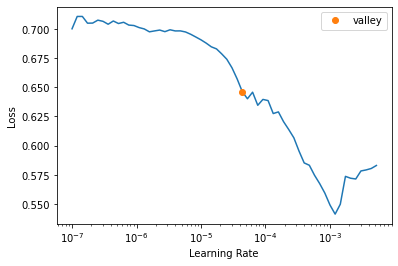

In [47]:
learn.lr_find()

In [48]:
learn.fine_tune(15, 4.36e-5)

epoch,train_loss,valid_loss,dice,time
0,0.557523,0.366607,0.849153,01:30


/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,dice,time
0,0.305198,0.342789,0.873508,01:28
1,0.279534,0.304022,0.874847,01:26
2,0.253804,0.300137,0.892867,01:26
3,0.227437,0.258570,0.906878,01:27
4,0.199017,0.224874,0.908514,01:27
5,0.174314,0.206423,0.915928,01:27
6,0.154518,0.215107,0.919613,01:27
7,0.137356,0.210828,0.921937,01:27
8,0.127375,0.202704,0.922802,01:27
9,0.118569,0.207198,0.923350,01:27


In [61]:
learn.export('fastai_tfl_253img.pkl')

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


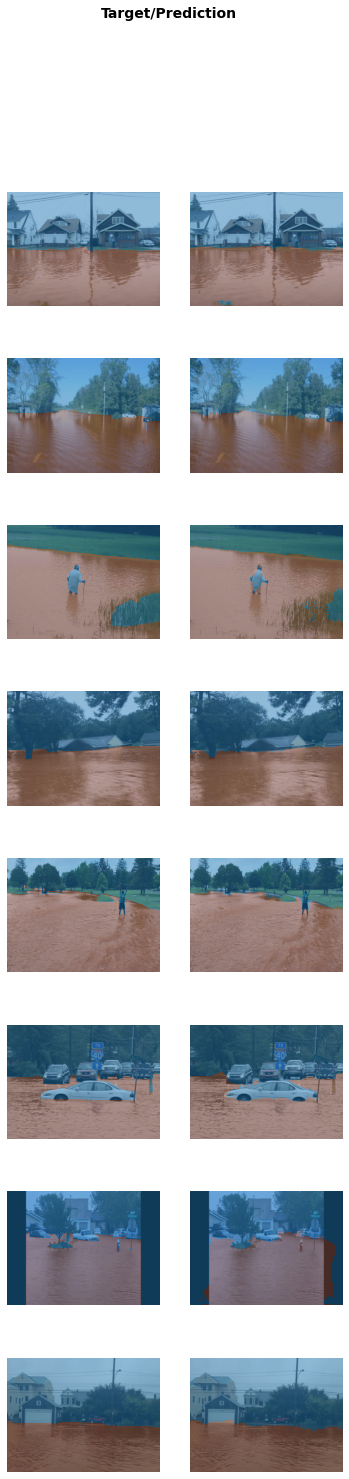

In [62]:
learn.show_results()